¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto de anális de datos para la marca Ice, como objetivo: planificar una campaña publicitaria 


## Introducción


En este apartado, voy a ir aperturando la info del data set, descubrir sus carecterísticas y posibles falloos que proximamente revisaré 

In [1]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [ ]:
#carga de l archivo
df_sucio=pd.read_csv("C:\Users\gabri\proy_concluidos\games.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

## correción y previsualización inicial



Seguiremos dando un primer vistazo y a empezar con correcciones de sintaxis y orden en el data set

In [3]:
df_sucio.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
new_column_name=[]
for column_name in df_sucio.columns:
    new_column_name.append(column_name.lower())
    

df_sucio.columns=new_column_name



In [5]:
df_sucio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df_sucio.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

In [7]:
df_duplicated=df_sucio[(df_sucio[["name"]].duplicated())&(df_sucio[["platform"]].duplicated())]
df_duplicated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


al parecer no hay duplicados relevantes 

In [8]:
df_sucio["year_of_release"].isna().sum()



269

In [9]:
df_sucio["year_of_release"]=df_sucio["year_of_release"].fillna(0).astype("int64")

In [10]:

df_games=df_sucio.dropna(subset=["name"])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen manejo de los datos faltantes.
</div>

 **considero que no debería hacer más modificaciones en los tipos de datos porque alteraria el análisis, tal vez podria poner la mediana del año o la mediana del rating para eliminar los NaN pero no me parece que contribuya a un análisis real; en mi análisis prefiero evadir esta info en caso de ser necesario, tambien decidí eliminar los dos elementos que no contenian el nombrr dado que considero que aporten información  norelevante. Tambienn es importante recalcar que al trabajar con el año de lanzamiento se debe trabajar con su mediana dado que el año NaN se remplazó con cero.**

In [11]:
df_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### clasificación de ventas según región


In [12]:
#agrupo según región
df_sales = df_games.pivot_table(
    index="name",
    values=["na_sales", "eu_sales", "jp_sales", "other_sales"],
    aggfunc="sum"
)





In [13]:
#agrupo la info general en una sola columna 
df_sales["total_sales"] = df_sales.sum(axis=1)  
df_sales = df_sales.reset_index()
df_sales=df_sales[["name", "total_sales"]]
df_sales

,name,total_sales
0,Beyblade Burst,0.03
1,Fire Emblem Fates,1.67
2,Frozen: Olaf's Quest,1.10
3,Haikyu!! Cross Team Match!,0.04
4,Tales of Xillia 2,0.84
...,...,...
11554,thinkSMART: Chess for Kids,0.01
11555,uDraw Studio,2.42
11556,uDraw Studio: Instant Artist,0.19
11557,wwe Smackdown vs. Raw 2006,3.00


In [14]:
games_sales=df_games.merge(df_sales, on= "name", how="inner")

En esta tabla encontramos la info general de cada juego y además, le agregamos un total de las ventas en todas las regiones a cáda uno.

In [15]:
games_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,45.31
2,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,45.31
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
16709,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buien hecho.
</div>

## analisis inicial

In [16]:
games_sales["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '8.1', '7.9', '9', '8.9', '7.5', '8.7', '8.8', '7.1', '3.4',
       '3.2', '2.5', '1.8', '6.4', '5.2', '5.8', '6', '5.3', '4.8', '4.2',
       '6.9', '7.8', '2.6', '3.7', '4.3', '7.2', '9.2', '7', '7.3', '4.4',
       '2.9', '5.6', '6.1', '1.6', '6.2', '4.1', '7.6', '3.3', '5.7',
       '5.4', '4.9', '4.5', '5', '5.5', '1.7', '9.1', '6.5', 'tbd', '3.8',
       '4.6', '6.7', '3.1', '2.4', '9.4', '6.8', '4.7', '4', '9.3', '3',
       '5.1', '3.5', '5.9', '3.9', '2.7', '3.6', '2.2', '2', '0.7', '0.2',
       '1.9', '1.4', '9.5', '2.1', '9.7', '2.8', '0', '9.6', '0.6', '1.5',
       '1.1', '0.5', '0.3', '1.3', '2.3', '1.2', '0.9', '1'], dtype=object)

### juegos lanzados por año

<AxesSubplot:title={'center':'total de lanzamientos por año'}, xlabel='año de lanzamiento', ylabel='cantidad'>

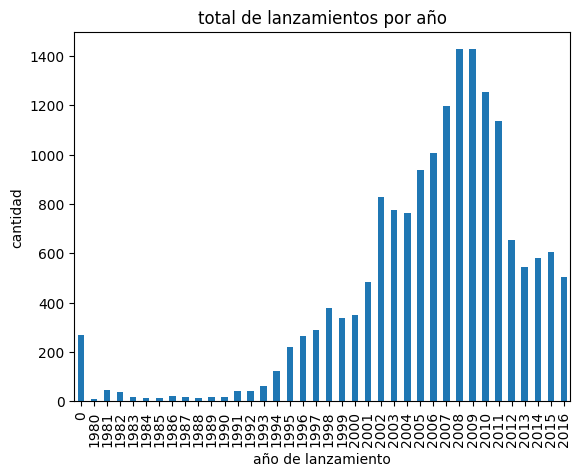

In [17]:



juegos_lanzados_por_año=games_sales.pivot_table(index="year_of_release", values="name", aggfunc="count").reset_index()
juegos_lanzados_por_año.columns=["year_of_release", "games_release"]
juegos_lanzados_por_año.plot(kind="bar", x="year_of_release", y="games_release", title="total de lanzamientos por año",  xlabel="año de lanzamiento", ylabel="cantidad", legend=False)

vemos que loss años con mayor número de lanzamientos en este periodo son en el 2008 y 2009 que coinciden con la resesión económica; tal vez tienen  una relación directa. tambien se observa un crecimiento exponencial desde 1988 hasta 2008, y luego una caida drástica en el número de lanzamientos


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Esta gráfica muestra correctamente las ventas a lo largo del año.
</div>

### clasificación según plataforma

In [18]:
platform_sales=games_sales.pivot_table(index="platform", values="total_sales", aggfunc="sum")
top_sales=platform_sales.sort_values(by="total_sales", ascending=False).reset_index().head(10)

In [19]:
top_sales=top_sales.iloc[:, 0:-1]
top_sales

,platform
0,X360
1,PS3
2,PS2
3,PC
4,Wii
5,DS
6,XB
7,PSP
8,PS
9,GC


In [20]:

top_sales_by_platform=games_sales.merge(top_sales, on="platform")
top_sales_by_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
3,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
4,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
12980,Army Men: Air Combat - The Elite Missions,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
12981,Rally Championship,GC,2003,Racing,0.01,0.00,0.00,0.00,63.0,tbd,E,0.01
12982,Darkened Skye,GC,2002,Adventure,0.01,0.00,0.00,0.00,61.0,6.4,T,0.01
12983,Space Raiders,GC,2003,Shooter,0.01,0.00,0.00,0.00,40.0,tbd,T,0.01


In [21]:
top_sales_by_platform=top_sales_by_platform.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum").reset_index()

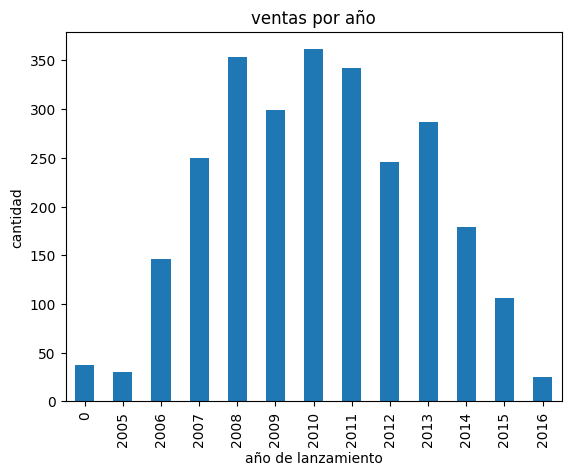

In [22]:
x360_sales= top_sales_by_platform[top_sales_by_platform["platform"]=="X360"]
x360_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)
plt.show()

<AxesSubplot:title={'center':'ventas por año'}, xlabel='año de lanzamiento', ylabel='cantidad'>

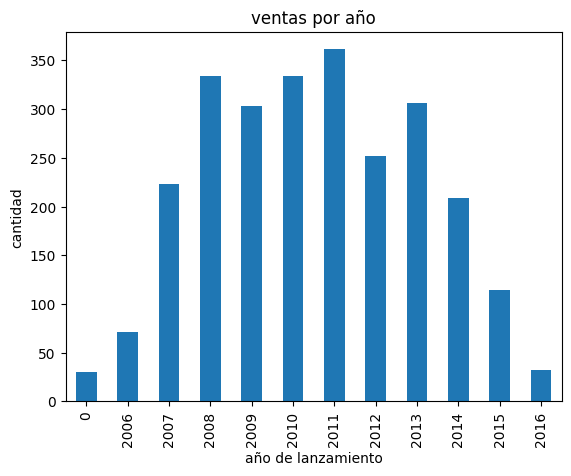

In [23]:
ps3_sales=top_sales_by_platform[top_sales_by_platform["platform"]=="PS3"]
ps3_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)

<AxesSubplot:title={'center':'ventas por año'}, xlabel='año de lanzamiento', ylabel='cantidad'>

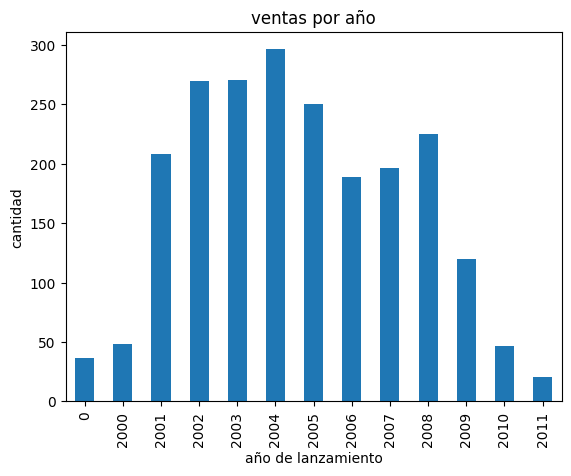

In [24]:
ps2_sales=top_sales_by_platform[top_sales_by_platform["platform"]=="PS2"]
ps2_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Se visualizan las ventas de estas dos plataformas. Sería interesante verlas juntas tal vez en una gráfica de dos barras o en una línea.
</div>

<AxesSubplot:title={'center':'ventas por año'}, xlabel='año de lanzamiento', ylabel='cantidad'>

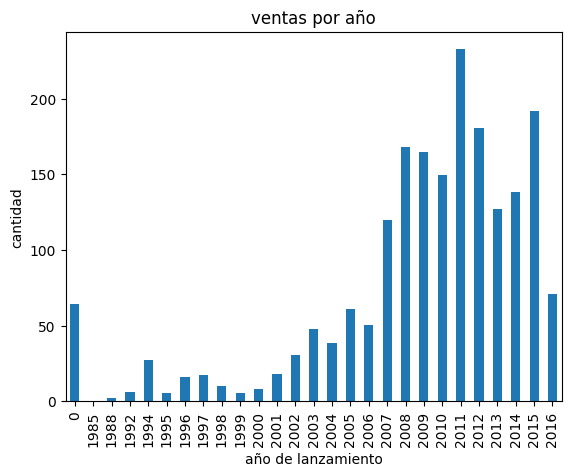

In [25]:
pc_sales=top_sales_by_platform[top_sales_by_platform["platform"]=="PC"]
pc_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)

<AxesSubplot:title={'center':'ventas por año'}, xlabel='año de lanzamiento', ylabel='cantidad'>

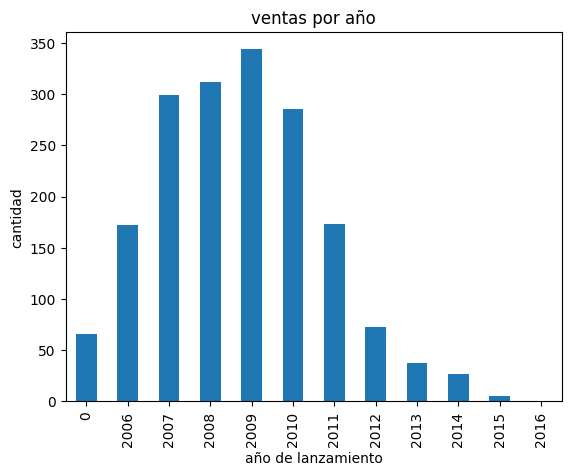

In [26]:
wii_sales=top_sales_by_platform[top_sales_by_platform["platform"]=="Wii"]
wii_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)

**todas estas son plataformas históricas pero que realmente estan desactualizádas, a excepción del pc que como lo muestra la gráfica ha venido en auge y a pesar que en algunos años baja en ventas, en los próximos años recupera aumentando aún más su cífra de ventas, por lo que voy a hacer un análisis alterno de la splataformas según losjuegos  cuyo lanzamiento es posterior al 2013(elegí el 2013 como referencia dado que es cuando el ps4 toma mas relevancia que el ps3)**

In [27]:
resent_games=games_sales[games_sales["year_of_release"]>=2013]
resent_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
18,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,56.58
19,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,56.58
20,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,56.58
21,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,56.58
22,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,56.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16702,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16706,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [28]:

resent_games.pivot_table(index="platform", values="total_sales", aggfunc="sum" ).sort_values(by="total_sales", ascending=False).reset_index().head()

,platform,total_sales
0,PS4,802.15
1,XOne,741.93
2,PS3,662.07
3,X360,597.48
4,PC,527.98


In [29]:
resent_games=resent_games.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum").reset_index()


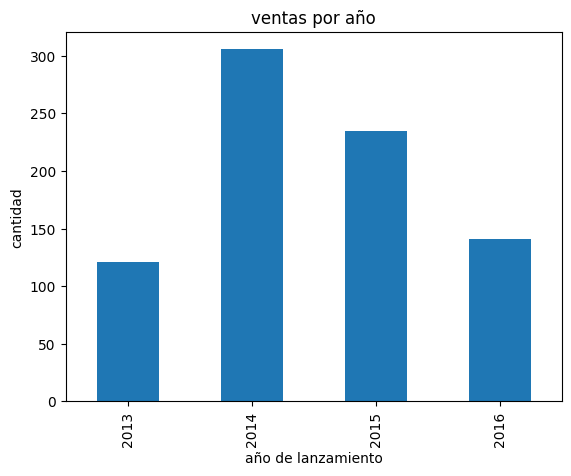

In [30]:
ps4_sales=resent_games[resent_games ["platform"]=="PS4"]
ps4_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)
plt.show()

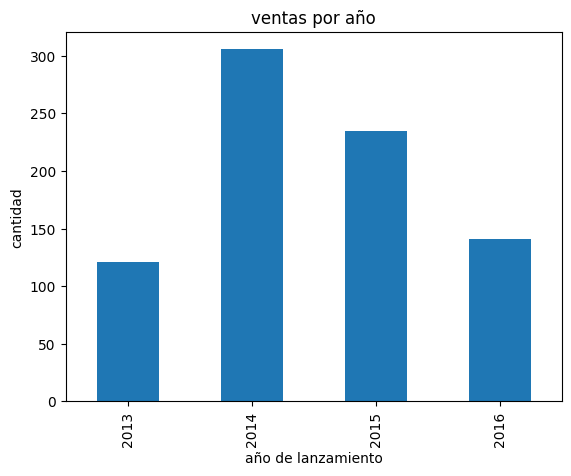

In [31]:
x_one_sales=resent_games[resent_games ["platform"]=="XOne"]
ps4_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)
plt.show()

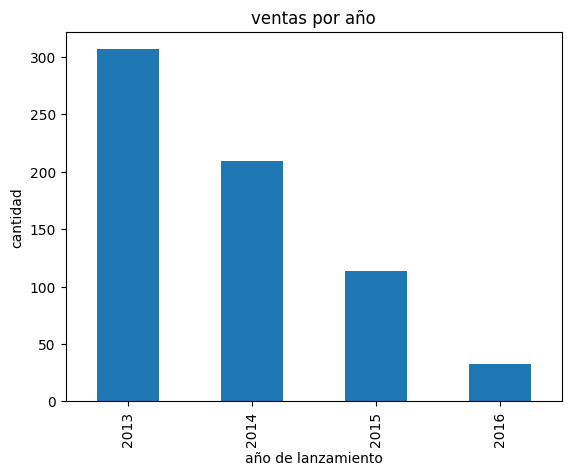

In [32]:
ps3_sales=resent_games[resent_games ["platform"]=="PS3"]
ps3_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)
plt.show()

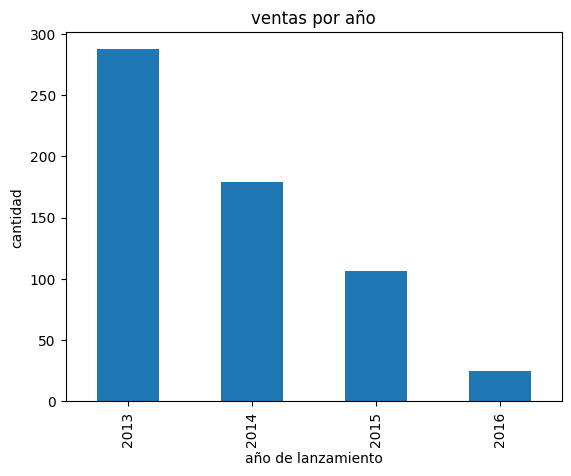

In [33]:
x360_sales=resent_games[resent_games ["platform"]=="X360"]
x360_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)
plt.show()

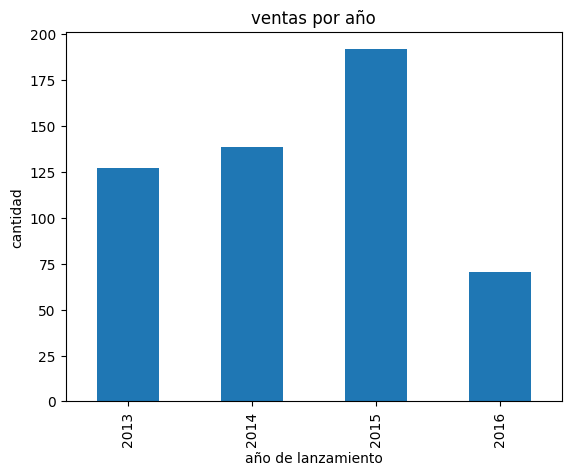

In [34]:
pc_sales=resent_games[resent_games ["platform"]=="PC"]
pc_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)
plt.show()

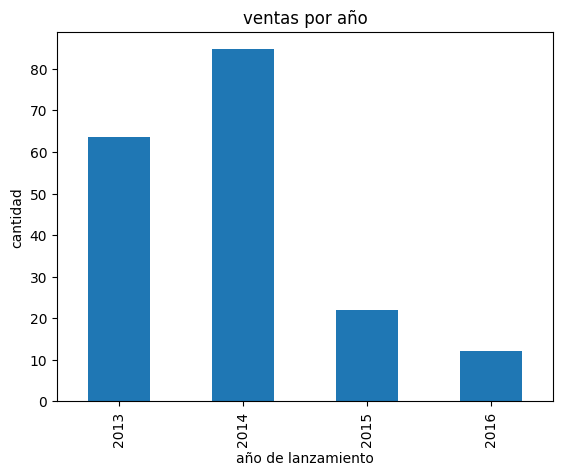

In [35]:
psv_sales=resent_games[resent_games ["platform"]=="PSV"]
psv_sales.plot(
    kind="bar",
    x="year_of_release", 
    y="total_sales", 
    title="ventas por año",  
    xlabel="año de lanzamiento",
    ylabel="cantidad",
    legend=False
)
plt.show()

**En este análisis inicial, podemos notar que pataformas como xbox360 o ps3 tienen una caida en la vebta de sus juegos, dado que ya existen nuevas vesiones de la plataforma atualizadas, adenás vemos que el pc continúa una linea de crecimiento aunque en el 2016 la totalidad de las plataformas hasta ahora analizadas se ven afectadas, por lo que voy a dirigir mi análisis hacia descubrir si existe alguna plataforma beneficiada  o si es un comportamiento general en el mercado de los videojuegos.**

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis de las ventas por plataformas. Para poder compararlas mejor sería ideal realizar una única gráfica que contenga las principales plataformas y poderlas comparar. Te dejo un enlace con ejemplos a gráficas de línea con múltiples líneas. https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/
</div>

<AxesSubplot:xlabel='year_of_release'>

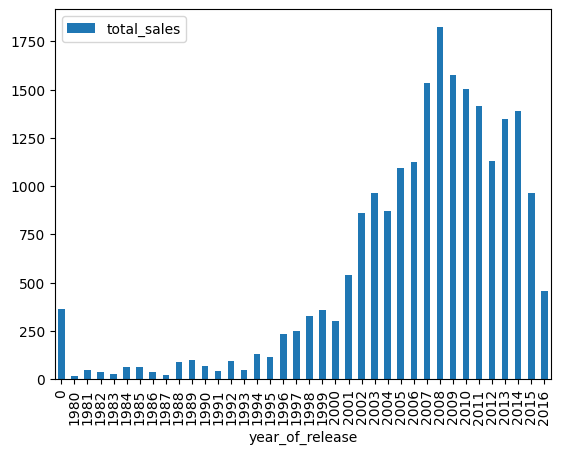

In [36]:
games_sales.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").reset_index().plot(kind="bar", x="year_of_release", y="total_sales")

con esta gráfica podemos observar que el mercado de los videojuegos se está viendo afectado y va en decaida desde el 2014, seria bueno saber qué estrategias utilizaron en el 2013 y en el 2007 para subir las ventas; tambien voy a profundizar en saber si alguna plataforma tuvo alza en las ventas en el 2016 

In [37]:
resent_games.pivot_table(index=["platform","year_of_release"], values="total_sales", aggfunc="sum")#.sort_values(by="year_of_release")

total_sales
platform year_of_release             
3DS      2013                  112.29
         2014                   86.20
         2015                   41.70
         2016                   21.88
DS       2013                   12.66
PC       2013                  127.03
         2014                  138.46
         2015                  191.83
         2016                   70.66
PS3      2013                  306.63
         2014                  209.13
         2015                  113.91
         2016                   32.40
PS4      2013                  121.01
         2014                  305.40
         2015                  235.05
         2016                  140.69
PSP      2013                   22.48
         2014                    0.85
         2015                    0.15
PSV      2013                   63.67
         2014                   84.66
         2015                   21.90
         2016                   12.04
Wii      2013                   37.67
         2014                   27.24
         2015                    4.96
         2016                    0.43
WiiU     2013                  139.75
         2014                   64.59
         2015                   31.41
         2016                   34.54
X360     2013                  287.02
         2014                  178.77
         2015                  106.50
         2016                   25.19
XOne     2013                  118.96
         2014                  291.07
         2015                  214.44
         2016                  117.46

con la tabla nos podemos dar cuenta que la unica plataforma que aumento en su venta de juegos fue wiiu, lo que es interesante dado su largo tiempo en el mercado.
además,  la XOne es la que mayor número de ventas tiene actualmente (2016)
**podemos concluir a partir de las gráficas que las plataformas las cuales fueron renovadas por otro modelo, tienden a bajar sus ventas en juegos**

**para el análisis de las plataformas voy a tomar dátos de las plataformas actuales dado que son las que se encuentran en tendencia de ventas(superiores al 2013)**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Esta información es correcta.
</div>

#### rentabilidad según plataforma en los ultimos años

,platform,total_sales
0,3DS,262.07
1,DS,12.66
2,PC,527.98
3,PS3,662.07
4,PS4,802.15
5,PSP,23.48
6,PSV,182.27
7,Wii,70.30
8,WiiU,270.29
9,X360,597.48


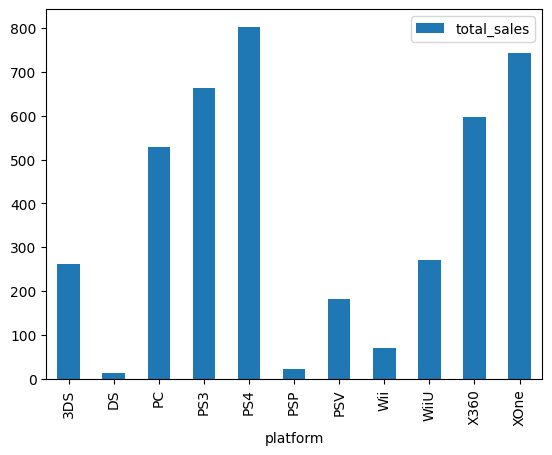

In [38]:
resent_games_general=resent_games.pivot_table(index="platform", values="total_sales", aggfunc="sum")
resent_games_general.reset_index().plot(kind="bar", x="platform", y="total_sales")
resent_games_general.reset_index()

#### Rentabilidad en el ultimo año 

,platform,total_sales
3,PS4,140.69
8,XOne,117.46
1,PC,70.66
6,WiiU,34.54
2,PS3,32.40
7,X360,25.19
0,3DS,21.88
4,PSV,12.04
5,Wii,0.43


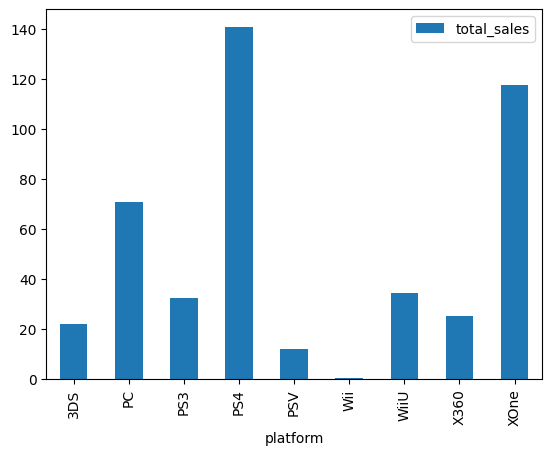

In [39]:
resent_games_2016=resent_games[resent_games["year_of_release"]==2016]
resent_games_2016=resent_games_2016.pivot_table(index="platform", values="total_sales", aggfunc="sum")
resent_games_2016.reset_index().plot(kind="bar", x="platform", y="total_sales")
resent_games_2016.reset_index().sort_values(by="total_sales",ascending=False)

In [40]:
resent_games_2016.sort_values(by="total_sales",ascending=False)

,total_sales
platform,
PS4,140.69
XOne,117.46
PC,70.66
WiiU,34.54
PS3,32.40
X360,25.19
3DS,21.88
PSV,12.04
Wii,0.43


**al parecer, las plataformas mas rentables en este periodo anterior son el ps4 el xone y el pc, tanto en la general del 2013-2016 como en solo el 2016, por lo que me centraré en estos, aunque antes de eso voy a revisar en cuanto tiempo las nuevas plataformas toman una alza en el mercado para saber si uncluyo la psv en la lista**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho.
</div>

In [41]:
ps3_sales

,platform,year_of_release,total_sales
9,PS3,2013,306.63
10,PS3,2014,209.13
11,PS3,2015,113.91
12,PS3,2016,32.40


[]

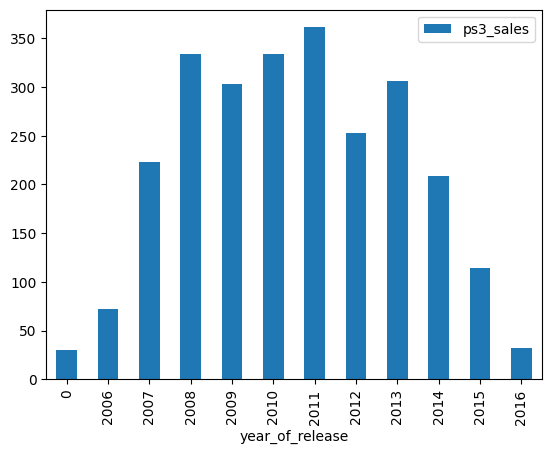

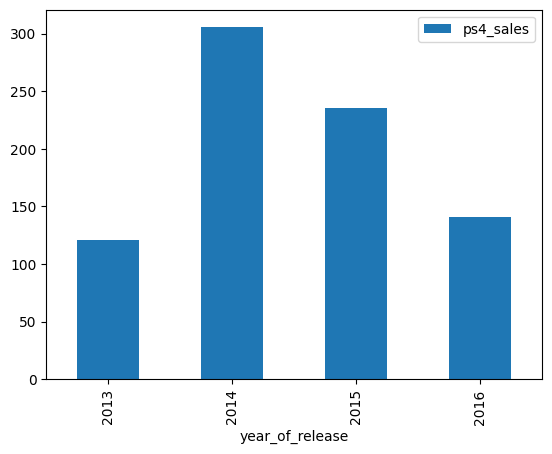

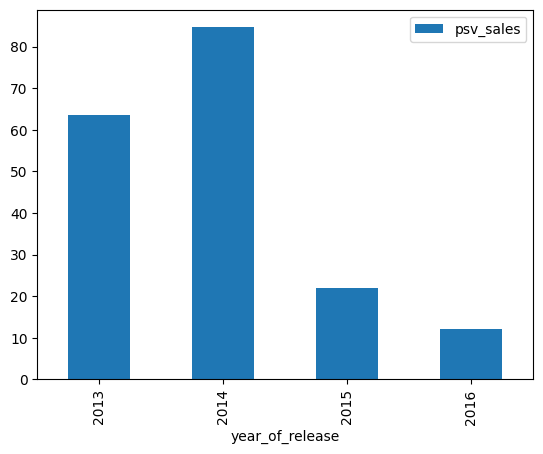

In [42]:
filtered_df = games_sales[
    games_sales["platform"].str.strip().str.lower().isin(["ps3","ps4", "psv"])
]
filtered_df=filtered_df.pivot_table(index=["platform","year_of_release"], values="total_sales", aggfunc="sum").reset_index()
ps3_sales=filtered_df[filtered_df["platform"]=="PS3"]
ps4_ales=filtered_df[filtered_df["platform"]=="PS4"]
psv_ales=filtered_df[filtered_df["platform"]=="PSV"]
ps3_sales.plot(kind="bar",x="year_of_release", y="total_sales", xlabel="year_of_release", label="ps3_sales")
ps4_sales.plot(kind="bar",x="year_of_release", y="total_sales", xlabel="year_of_release", label="ps4_sales")
psv_sales.plot(kind="bar",x="year_of_release", y="total_sales", xlabel="year_of_release", label="psv_sales")
plt.plot()


Al parecer en el psv tiene pocas ventasen los juegos, en mi opinion, considero que es por la posibilidad de comprar un plan con mas de un juego integrádo, me parece importante mencionar esta conclusión, ya que si se quiere realizar una nueva campaña, podría considerarse cambiar el enfoque hacia un plan conjunto de juego o centrarse en la venta de videojuegos para plataformas antiguas que no permitan este tipo de planes

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis de las ventas en psv.
</div>

#### análisis por juego según plataforma

En este apartado vamos a observar la  distribución normal de la venta de cada juego en un gráfico de caja por las plataformas que por el anterir análisis descubrí que son las más rentábles actualmente:
- ps4
- XOne
- Pc

In [43]:
sales_for_game=games_sales.pivot_table(index=["platform", "name"], values="total_sales", aggfunc="sum" ).reset_index()

media de la venta
2.0463010204081633 mean
 ______________________________________________
mediana de la venta
0.42000000000000004 median
 ______________________________________________
top juegos más vendidos en la plataforma 
                             name  total_sales
0              Grand Theft Auto V        56.58
1            Call of Duty: Ghosts        27.39
2       Call of Duty: Black Ops 3        25.67
3                       Minecraft        24.16
4  Call of Duty: Advanced Warfare        21.97 
 ______________________________________________


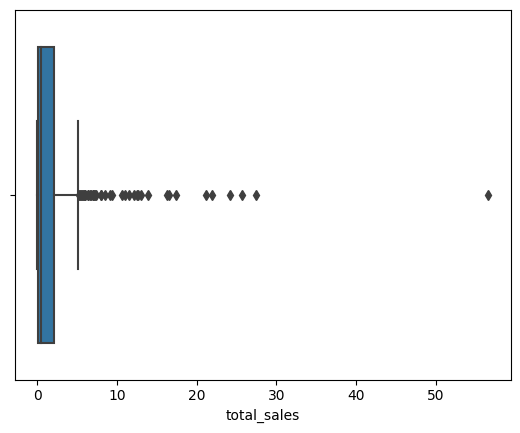

In [44]:
boxplot_ps4=sales_for_game[sales_for_game["platform"]=="PS4"]
sns.boxplot(boxplot_ps4["total_sales"])
print("media de la venta")
print(boxplot_ps4["total_sales"].mean(), "mean\n ______________________________________________")
print("mediana de la venta")
print(boxplot_ps4["total_sales"].median(),"median\n ______________________________________________")
print("top juegos más vendidos en la plataforma ")
print(boxplot_ps4.sort_values(by="total_sales", ascending= False)[["name", "total_sales"]].reset_index(drop=True).head(),"\n ______________________________________________")

media de la venta
3.003765182186235 mean
 ______________________________________________
mediana de la venta
1.3099999999999998 median
 ______________________________________________
top juegos más vendidos en la plataforma 
                             name  total_sales
0              Grand Theft Auto V        56.58
1            Call of Duty: Ghosts        27.39
2       Call of Duty: Black Ops 3        25.67
3                       Minecraft        24.16
4  Call of Duty: Advanced Warfare        21.97 
 ______________________________________________


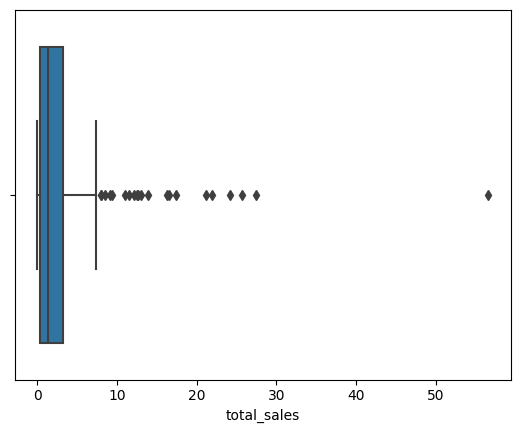

In [45]:
boxplot_xone=sales_for_game[sales_for_game["platform"]=="XOne"]
sns.boxplot(boxplot_xone["total_sales"])
print("media de la venta")
print(boxplot_xone["total_sales"].mean(), "mean\n ______________________________________________")
print("mediana de la venta")
print(boxplot_xone["total_sales"].median(),"median\n ______________________________________________")
print("top juegos más vendidos en la plataforma ")
print(boxplot_xone.sort_values(by="total_sales", ascending= False)[["name", "total_sales"]].reset_index(drop=True).head(),"\n ______________________________________________")

media de la venta
2.005488180883864 mean
 ______________________________________________
mediana de la venta
0.38 median
 ______________________________________________
top juegos más vendidos en la plataforma 
                             name  total_sales
0              Grand Theft Auto V        56.58
1         Call of Duty: Black Ops        30.82
2  Call of Duty: Modern Warfare 3        30.60
3      Call of Duty: Black Ops II        29.40
4     Need for Speed: Most Wanted        27.54 
 ______________________________________________


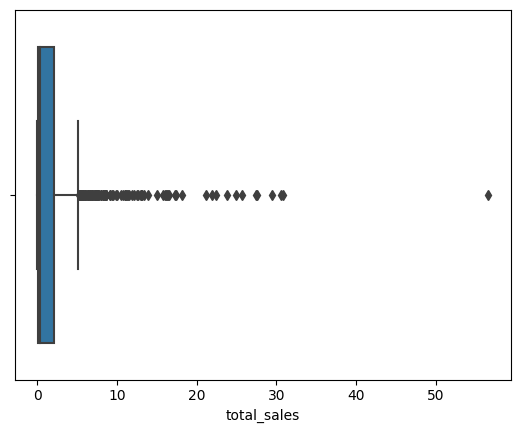

In [46]:
boxplot_pc=sales_for_game[sales_for_game["platform"]=="PC"]
sns.boxplot(boxplot_pc["total_sales"])
print("media de la venta")
print(boxplot_pc["total_sales"].mean(), "mean\n ______________________________________________")
print("mediana de la venta")
print(boxplot_pc["total_sales"].median(),"median\n ______________________________________________")
print("top juegos más vendidos en la plataforma ")
print(boxplot_pc.sort_values(by="total_sales", ascending= False)[["name", "total_sales"]].reset_index(drop=True).head(),"\n ______________________________________________")

In [47]:
boxplot_xone[boxplot_xone["name"]=="Grand Theft Auto V"]

,platform,name,total_sales
16553,XOne,Grand Theft Auto V,56.58


In [48]:
games_sales[games_sales["name"]=="Grand Theft Auto V"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
18,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,56.58
19,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,56.58
20,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,56.58
21,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,56.58
22,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,56.58


**dado que hay plataformas que tienen un juego en común y solo tenemos el total_sales disponible y no un independiente por plataforma, no podremos confiarnos de la media porque se ve contamniado por un valor tan alto como el total_sales de Grand Theft Auto V, mas bien determinarémos qcon la mediana la plataforma con mayor ranfo de ventasb; por lo que en este caso la plataforma con mas ventas es el xbox one.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Genial! De esta manera es fácil ver los juegos más vendidos para poder hacer juegos similares.
</div>

#### Anális del comportamiento de vntas según la reseña 

voy a tomar como referencia al XOne, dado que tiene la mediana mas alta de venta

In [49]:
games_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,45.31
2,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,45.31
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
16709,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'Ventas vs Puntuación de Usuarios (XOne)'}, xlabel='Puntuación de Usuarios', ylabel='Ventas Totales'>

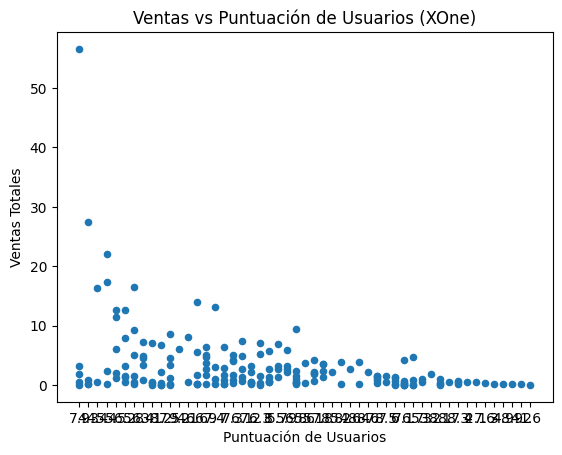

In [52]:

games_sales_for_score = games_sales[
    (games_sales["platform"] == "XOne") &
    (~games_sales["user_score"].isna()) &
    (games_sales["user_score"]!= "tbd") &
    (games_sales["year_of_release"]>= 2013)
]
games_sales_for_score.plot.scatter(
    x="user_score",
    y="total_sales",
    marker="o",
    title="Ventas vs Puntuación de Usuarios (XOne)",
    xlabel="Puntuación de Usuarios",
    ylabel="Ventas Totales"
)

In [76]:

games_sales_for_score["user_score"]=pd.to_numeric(games_sales_for_score["user_score"], errors="coerce")
pd.options.mode.chained_assignment = None  

In [77]:
print(games_sales_for_score["user_score"].corr(games_sales_for_score["total_sales"]))


-0.05595999728142845


**Al parecer en este caso, aunque muy sutilmente, afecta de forma negativa la buena calificación de los usuarios a la venta de los juegos, se puede observar que no les es muy relevante este apartado**

In [ ]:
games_sales_for_critic_score = games_sales[
    (games_sales["platform"] == "XOne") &
    (~games_sales["critic_score"].isna()) &
    (games_sales["year_of_release"]>= 2013)
]

games_sales_for_critic_score.plot(style="o", x="critic_score", y="total_sales")


In [ ]:
print(games_sales_for_critic_score["critic_score"].corr(games_sales_for_critic_score["total_sales"]))

Evidenciamos que hay al rededor de un 33% de correlación en la muestra,  a un tercio de la población le es relevante el score de la crítica; tal vez porque es la primera referencia quue tiene el cliente con respecto al juego.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se puede ver la relación entre las críticas y las ventas de los juegos.
</div>

In [79]:
resent_games_sales=games_sales[games_sales["year_of_release"]>=2014]

In [ ]:
resent_games_sales

In [ ]:
games_sales

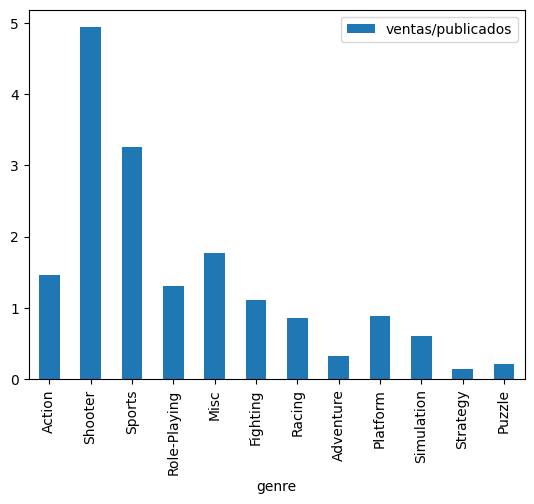

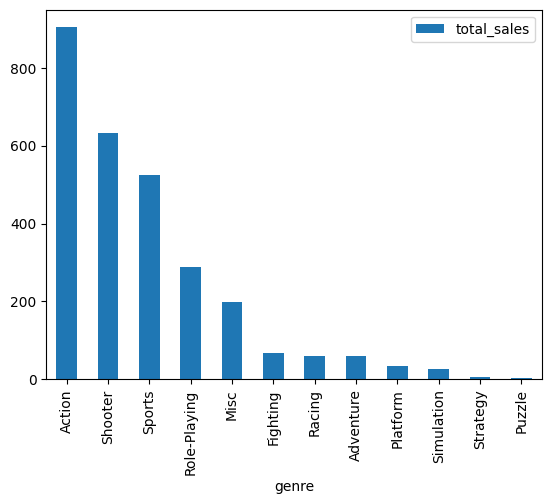

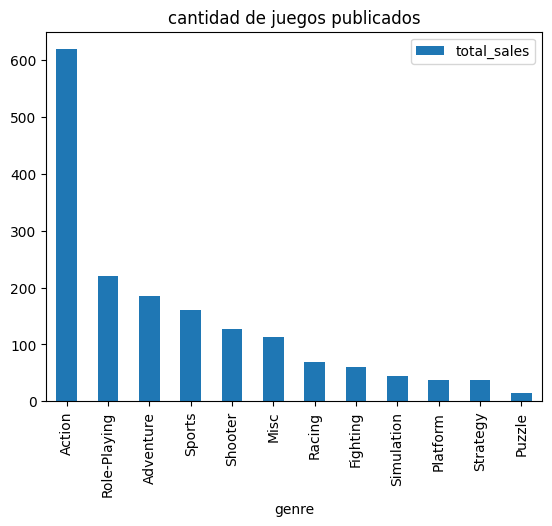

In [80]:
games_sales_for_genre=resent_games_sales.pivot_table(index="genre", values="total_sales", aggfunc="sum").reset_index().sort_values(by="total_sales", ascending=False).reset_index(drop=True)
games_sales_for_genre_count=resent_games_sales.pivot_table(index="genre", values="total_sales", aggfunc="count").reset_index().sort_values(by="total_sales", ascending=False).reset_index(drop=True)
games_sales_for_genre_count
games_venta_real=games_sales_for_genre.merge(games_sales_for_genre_count, on="genre")
games_sales_for_genre["ventas/publicados"]= games_venta_real["total_sales_x"]/games_venta_real["total_sales_y"]
games_sales_for_genre.plot(kind="bar", x="genre", y="ventas/publicados" )
games_sales_for_genre.plot(kind="bar", x="genre",y="total_sales")
games_sales_for_genre_count.plot(kind="bar", x="genre", y="total_sales", title="cantidad de juegos publicados")
plt.show()

**En las ventas generales, hay una gran diferencia entre los juegos de acción con los de estrategiaa;  sin embargo, esto suelecambiar según la cultura. Dada esta situación, dividiré el análisis en cada región (NA, UE, JP).
Tambien podemos determinar que aunque action tiene un mayor numero de ventaqs, en promedio tiene mayor venta los juegos de shooter, esto se debe a que hay muchos juegos de acción publiucados, unos muy exitos como otros no tanto**


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis .
</div>

#### Análisis según región
en este apartádo determinaremos los generos y plataformas  mas representativos para cada región, además que determinarémos si las clasificaciones de ESRB afectan a las ventas

##### top 5 generos principales



###### Ventas en Norte América

In [ ]:
na_sales=resent_games_sales.pivot_table(index="genre",values="na_sales", aggfunc="sum" ).reset_index().sort_values(by="na_sales", ascending=False).reset_index(drop=True)

top_na_sales= na_sales.head()
top_na_sales.plot(kind="bar", x="genre", y="na_sales")

###### Ventas en Európa

In [ ]:
eu_sales=resent_games_sales.pivot_table(index="genre",values="eu_sales", aggfunc="sum").reset_index().sort_values(by="eu_sales", ascending=False).reset_index(drop=True)
top_eu_sales=eu_sales.head()
top_eu_sales.plot(kind="bar", x="genre", y="eu_sales")

###### Ventas en Japón

In [ ]:
jp_sales=resent_games_sales.pivot_table(index="genre",values="jp_sales", aggfunc="sum").reset_index().sort_values(by="jp_sales", ascending=False).reset_index(drop=True)
top_jp_sales=jp_sales.head()
top_jp_sales.plot(kind="bar", x="genre", y="jp_sales")

Podemos observa que endos de las tres regiones se prefiere el genero de acción, por lo que es el más rentable con casi 1400MD en ventas, sin embargo yo consideraría la alta oferta de este género teniendo en cuenta que hay mas de 3mil juegos de acción publicádos, personalmente, optaría por shooter en las regiones aparte de japón, dado que es el que es la que tiene un mayor promedio en ventas por juego publicádo.

##### top 5 plataformas principales



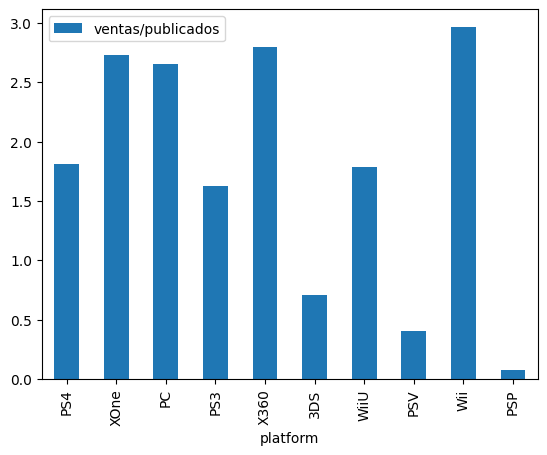

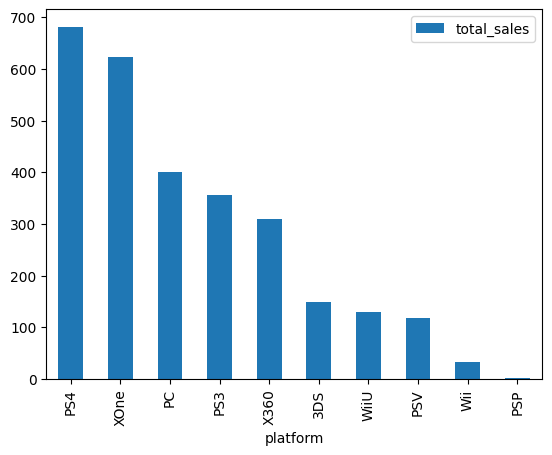

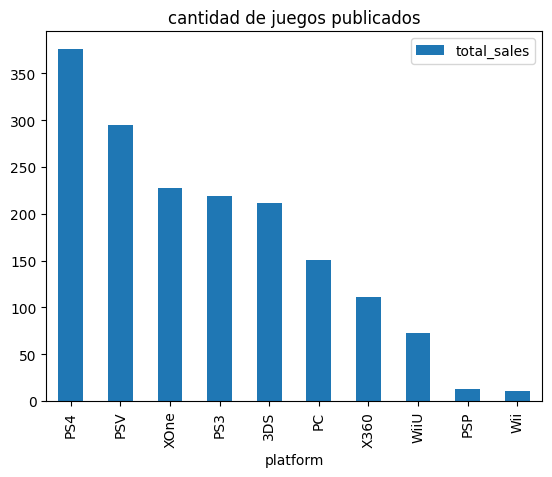

In [87]:
games_sales_for_platform=resent_games_sales.pivot_table(index="platform", values="total_sales", aggfunc="sum").reset_index().sort_values(by="total_sales", ascending=False).reset_index(drop=True)
games_sales_for_platform_count=resent_games_sales.pivot_table(index="platform", values="total_sales", aggfunc="count").reset_index().sort_values(by="total_sales", ascending=False).reset_index(drop=True)
games_sales_for_platform_count
games_venta_real=games_sales_for_platform.merge(games_sales_for_platform_count, on="platform")
games_sales_for_platform["ventas/publicados"]= games_venta_real["total_sales_x"]/games_venta_real["total_sales_y"]
games_sales_for_platform.plot(kind="bar", x="platform", y="ventas/publicados" )
games_sales_for_platform.plot(kind="bar", x="platform",y="total_sales")
games_sales_for_platform_count.plot(kind="bar", x="platform", y="total_sales", title="cantidad de juegos publicados")
plt.show()

###### Ventas en Norte América

In [ ]:
na_sales=resent_games_sales.pivot_table(index="platform",values="na_sales", aggfunc="sum" ).reset_index().sort_values(by="na_sales", ascending=False).reset_index(drop=True)

top_na_sales= na_sales.head()
top_na_sales.plot(kind="bar", x="platform", y="na_sales")

###### Ventas en Európa

In [ ]:
eu_sales=resent_games_sales.pivot_table(index="platform",values="eu_sales", aggfunc="sum").reset_index().sort_values(by="eu_sales", ascending=False).reset_index(drop=True)
top_eu_sales=eu_sales.head()
top_eu_sales.plot(kind="bar", x="platform", y="eu_sales")

###### Ventas en Japón

In [ ]:
jp_sales=resent_games_sales.pivot_table(index="platform",values="jp_sales", aggfunc="sum").reset_index().sort_values(by="jp_sales", ascending=False).reset_index(drop=True)
top_jp_sales=jp_sales.head()
top_jp_sales.plot(kind="bar", x="platform", y="jp_sales")

Podemos observa que endos de las tres regiones se prefiere el genero de acción, por lo que es el más rentable con casi 1400MD en ventas, sin embargo yo consideraría la alta oferta de este género teniendo en cuenta que hay mas de 3mil juegos de acción publicádos, personalmente, optaría por shooter en las regiones aparte de japón, dado que es el que es la que tiene un mayor promedio en ventas por juego publicádo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis de las ventas por región, el género es muy relevante al decidir de que se harán los juegos.
</div>

##### Efecto en las ventas según su clasificación



In [88]:
sales_x_clasifición=resent_games_sales[~resent_games_sales["rating"].isna()]


<AxesSubplot:xlabel='rating'>

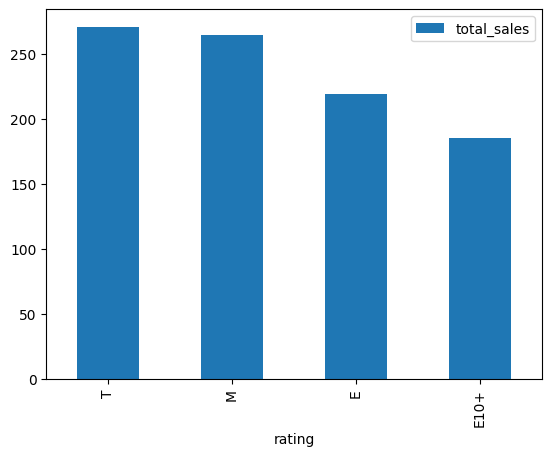

In [89]:
sales_x_clasificación_count=resent_games_sales.pivot_table(index="rating", values="total_sales", aggfunc="count").reset_index().sort_values(by="total_sales", ascending=False).reset_index(drop=True)
sales_x_clasificación_count.plot(kind="bar", x="rating", y="total_sales")

La gran parte de los videojuegos publicádos despues del 2013, son de clasificación t(teen) y M(Mature)


<AxesSubplot:xlabel='rating'>

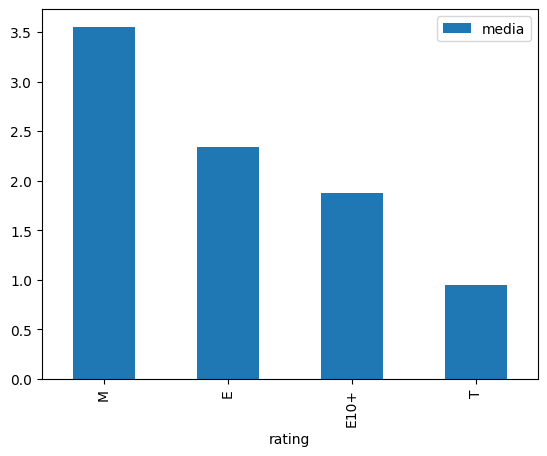

In [90]:
sales_x_clasificación_sum=resent_games_sales.pivot_table(index="rating", values="total_sales", aggfunc="sum").reset_index().sort_values(by="total_sales", ascending=False).reset_index(drop=True)
# sales_x_clasificación_sum.plot(kind="bar", x="rating", y="total_sales")
sales_media_x_clasificación=sales_x_clasificación_sum.merge(sales_x_clasificación_count, on="rating", )
sales_media_x_clasificación
sales_media_x_clasificación["media"]=sales_media_x_clasificación["total_sales_x"]/sales_media_x_clasificación["total_sales_y"]
sales_media_x_clasificación.plot(kind="bar", x="rating", y="media")

A pesar de que la clasificación T tiene un total de ventas bastante alto, la media de éste es la menor, lo que demuestra que realmente no es muy rentable por lo que como analísta recomendaría centrarse en una población madura

###### Ventas en Norte América

In [ ]:
na_sales=sales_x_clasifición.pivot_table(index="rating",values="na_sales", aggfunc="sum" ).reset_index().sort_values(by="na_sales", ascending=False).reset_index(drop=True)

top_na_sales= na_sales.head()
top_na_sales.plot(kind="bar", x="rating", y="na_sales")

###### Ventas en Európa

In [ ]:
eu_sales=sales_x_clasifición.pivot_table(index="rating",values="eu_sales", aggfunc="sum").reset_index().sort_values(by="eu_sales", ascending=False).reset_index(drop=True)
top_eu_sales=eu_sales.head()
top_eu_sales.plot(kind="bar", x="rating", y="eu_sales")

###### Ventas en Japón

In [ ]:
jp_sales=sales_x_clasifición.pivot_table(index="rating",values="jp_sales", aggfunc="sum").reset_index().sort_values(by="jp_sales", ascending=False).reset_index(drop=True)
top_jp_sales=jp_sales.head()
top_jp_sales.plot(kind="bar", x="rating", y="jp_sales")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. El rating también es relevante a la hora de hacer juegos.
</div>

## Pruebas de hipótesis
**En este apartádo, se formuló y comprobó hpótesis que ayuden a determinar una ruta de acción para determinar una campaña efectíva**

### ¿Existe diferencia entre las medias  de venta de dos de las platafomas más rentables en el mercado?

In [ ]:
#h0= la media de ventas de las plataformas es la misma
#h1= la media de ventas del XOne es superior a la de PC
alpha=0.025

In [91]:
pc_med_sales=games_sales[(games_sales["platform"]=="PC")&(~games_sales["platform"].isna())]
xone_med_sales=games_sales[(games_sales["platform"]=="XOne")&(~games_sales["platform"].isna())]
results=sts.ttest_ind(pc_med_sales["total_sales"], xone_med_sales["total_sales"], equal_var=False)


In [92]:
if (results.pvalue< alpha)&((xone_med_sales["total_sales"].mean())>(pc_med_sales["total_sales"].mean())):
    print("rechazamos la hipótesis nula")
else:
    print("aprovamos la hipótesis núla")

rechazamos la hipótesis nula


### ¿Existe diferencia entre las medias  de venta de dos de los géneros más vendidos?

In [84]:
#h0= la media de ventas de los generos es la misma
#h1= la media de ventas de disparos es superior a la de acción
alpha=0.05

In [85]:
accion_med_sales=games_sales[(games_sales["genre"]=="Action")&(~games_sales["platform"].isna())]
deportes_med_sales=games_sales[(games_sales["genre"]=="shooter")&(~games_sales["platform"].isna())]
results=sts.ttest_ind(accion_med_sales["total_sales"], deportes_med_sales["total_sales"], equal_var=False)


In [86]:
if (results.pvalue< alpha)&((deportes_med_sales["total_sales"].mean())>(accion_med_sales["total_sales"].mean())):
    print("rechazamos la hipótesis nula")
else:
    print("aprovamos la hipótesis núla")

aprovamos la hipótesis núla


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Realizaste de manera correcta la prueba de hipótesis. Solo me gustaría que también se imprimiera el p valor para poder visualizarlo.
</div>

## Conclusiones Generales

# Análisis de la información

## Hallazgos principales:
1. **La media de ventas de videojuegos general va decreciendo año tras año**, posiblemente por estrategias que unifican juegos en un solo plan que para el usuario es más rentable y atractivo, lo que afecta significativamente las ventas de juegos individuales.

2. **Existe una diferencia significativa entre el mercado japonés y otros países**:
   - Es clave para diseñar estrategias comerciales.
   -  Crear dos estrategias diferenciadas o priorizar la población norteamericana junto con la europea, evitando enfocarse en Japón.

3. **Géneros como "acción" tienen alta rentabilidad por volumen**, pero su media de ventas es baja debido a la gran cantidad de publicaciones en este género.

4. **Relevancia de las calificaciones**:
   - Los compradores no consideran relevante la calificación de usuarios.
   - La reseña crítica tiene **33% de correlación** con la capacidad de venta.

5. **Clasificación y género más rentable**:
   - La clasificación "M" (maduro) tiene la media de ventas más alta.
   - Coincide con que el género de disparos tiene mejor desempeño en ventas promedio y entra en esta categoría.

---

## Conclusiones de pruebas de hipótesis (95% de certeza):
- **"La media de ventas de XOne es superior a la de PC"**: Indica que XOne es una de las plataformas más rentables.  
- **"La media de ventas de disparos es superior a la de acción"**: Este género destaca para proponer nuevas campañas publicitarias.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones basadas en todo lo observado a lo largo del proyecto.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Me gustó bastante tu proyecto, está completo y bien realizado, me gustaron especialmente tus gráficas, solo recuerda ordenar las barras de mayor a menor para poder comparar las clases. Deje algunos comentarios amarillos pero son opcionales. Te deseo éxito en los siguientes sprints.
    
Saludos, Marcos.
</div>